In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [2]:
os.environ['KAGGLE_USERNAME'] = "thadimarrisameer"
os.environ['KAGGLE_KEY'] = "c6e3da0e9ef403fd472525cc34d60421"

In [3]:
# Downloading Pneumonia dataset from Kaggle
!kaggle datasets download jtiptj/chest-xray-pneumoniacovid19tuberculosis


  0%|          | 0.00/1.74G [00:00<?, ?B/s]
  0%|          | 1.00M/1.74G [00:01<31:27, 989kB/s]
  0%|          | 2.00M/1.74G [00:01<16:13, 1.92MB/s]
  0%|          | 3.00M/1.74G [00:01<11:45, 2.64MB/s]
  0%|          | 4.00M/1.74G [00:01<12:02, 2.58MB/s]
  0%|          | 5.00M/1.74G [00:02<11:07, 2.79MB/s]
  0%|          | 7.00M/1.74G [00:02<08:08, 3.81MB/s]
  0%|          | 8.00M/1.74G [00:02<07:33, 4.10MB/s]
  1%|          | 9.00M/1.74G [00:02<07:11, 4.31MB/s]
  1%|          | 10.0M/1.74G [00:03<06:39, 4.65MB/s]
  1%|          | 11.0M/1.74G [00:03<06:44, 4.59MB/s]
  1%|          | 12.0M/1.74G [00:03<06:21, 4.86MB/s]
  1%|          | 13.0M/1.74G [00:03<06:02, 5.12MB/s]
  1%|          | 14.0M/1.74G [00:03<05:31, 5.59MB/s]
  1%|          | 15.0M/1.74G [00:04<06:47, 4.54MB/s]
  1%|          | 16.0M/1.74G [00:04<06:35, 4.68MB/s]
  1%|          | 17.0M/1.74G [00:04<07:32, 4.08MB/s]
  1%|          | 18.0M/1.74G [00:04<06:55, 4.45MB/s]
  1%|          | 19.0M/1.74G [00:05<07:50, 3.93MB/s]
  

## Total Pneumoina Images In Dataset

In [4]:
len(os.listdir('chest-xray-pneumoniacovid19tuberculosis/train/PNEUMONIA'))

3875

## Below is the X-Ray image of a person suffering from Pneumonia.

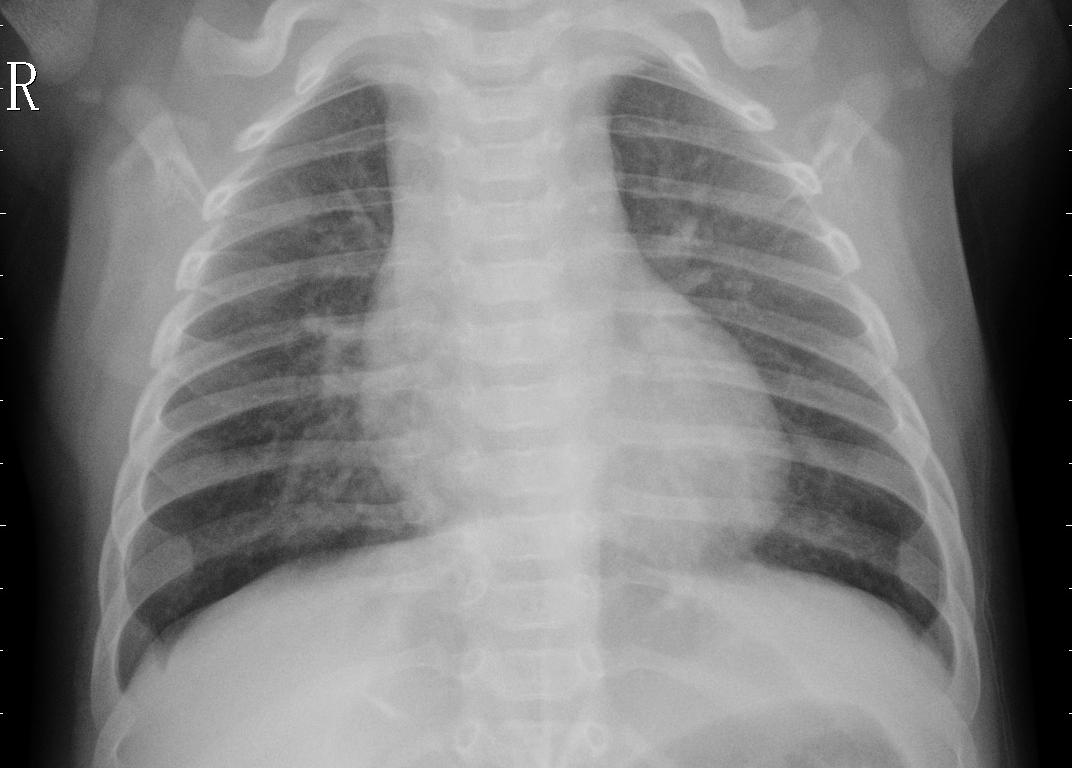

In [5]:
img = "chest-xray-pneumoniacovid19tuberculosis/train/PNEUMONIA/person1000_virus_1681.jpeg"
PIL.Image.open(img)

## Total Normal Chest X-ray Images In Dataset

In [6]:
len(os.listdir('chest-xray-pneumoniacovid19tuberculosis/train/NORMAL'))

1341

## Below is the X-Ray Image Of Normal Lungs

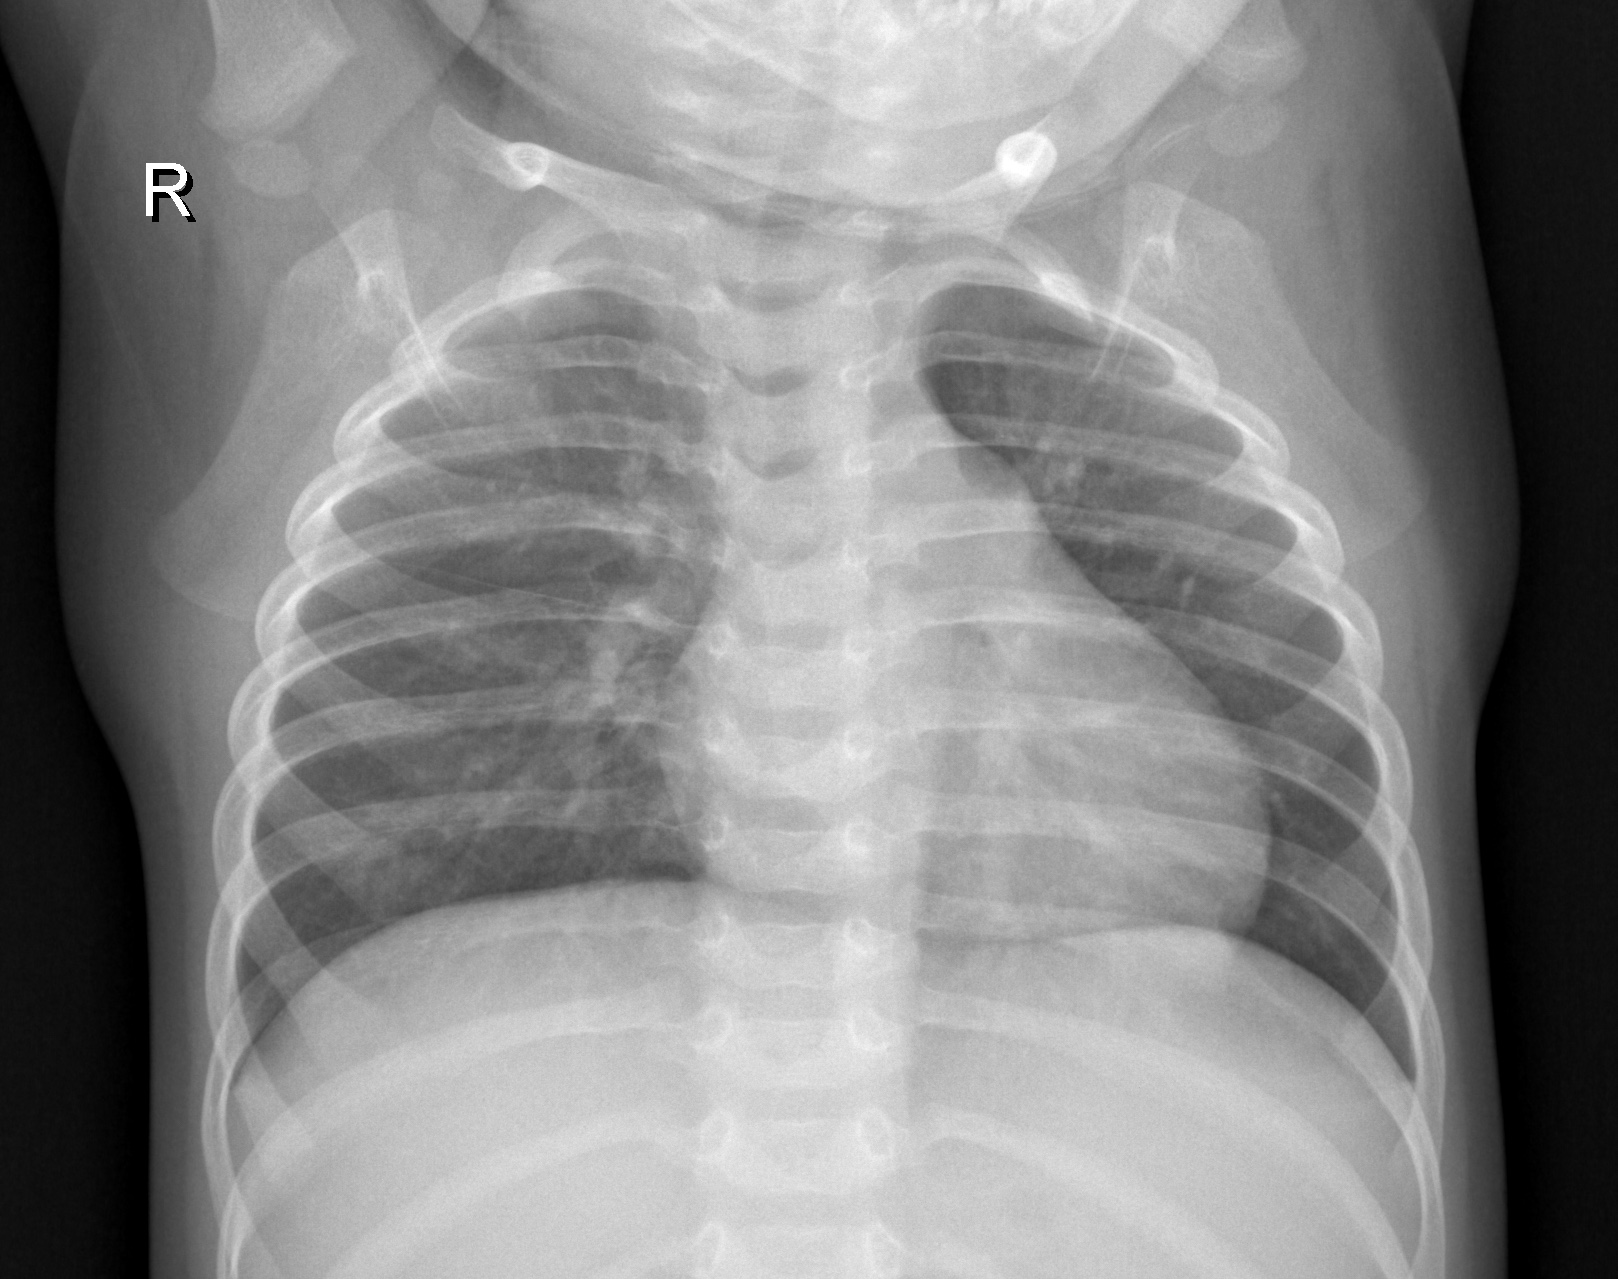

In [7]:
img = "chest-xray-pneumoniacovid19tuberculosis/train/NORMAL/IM-0122-0001.jpeg"
PIL.Image.open(img)

# Loading The Training and Validation Images From the Dataset

In [8]:
urls = os.listdir('chest-xray-pneumoniacovid19tuberculosis/train/PNEUMONIA')
# print(urls)
path = "chest-xray-pneumoniacovid19tuberculosis/train/PNEUMONIA"+urls[0]

In [9]:
path

'chest-xray-pneumoniacovid19tuberculosis/train/PNEUMONIAperson1000_bacteria_2931.jpeg'

In [10]:
def loadImages(path,urls,target):
    images=[]
    labels=[]
    for i in range(len(urls)):
        img_path = path+"/"+urls[i]
        img = cv2.imread(img_path)
        img = img/255.0
        img = cv2.resize(img, (100,100))
        images.append(img)
        labels.append(target)
    images = np.asanyarray(images)
    return images,labels

In [11]:
# Loading CovidDataset Images 
PneumoniaPath = "chest-xray-pneumoniacovid19tuberculosis/train/PNEUMONIA"
PneumoniaUrl = os.listdir(PneumoniaPath)
PneumoniaImages, PneumoniaTargets = loadImages(PneumoniaPath,PneumoniaUrl,1)

In [12]:
# Loading NormalDataset images
normalPath = "chest-xray-pneumoniacovid19tuberculosis/train/NORMAL"
normalUrl = os.listdir(normalPath)
normalImages , normalTargets = loadImages(normalPath,normalUrl,0)

In [13]:
PneumoniaImages = np.asarray(PneumoniaImages)
normalImages = np.asarray(normalImages)
PneumoniaImages.shape

(3875, 100, 100, 3)

In [14]:
normalImages.shape

(1341, 100, 100, 3)

In [15]:
# Concatenating Both Normal Images and Covid19 Images
Mixed_Datasets = np.r_[PneumoniaImages,normalImages]
Mixed_Datasets.shape

(5216, 100, 100, 3)

In [16]:
Targets = np.r_[PneumoniaTargets, normalTargets]

# Developing a Convolutional Neural Network for the classification task

In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [18]:
x_train, x_test, y_train, y_test = train_test_split(Mixed_Datasets,Targets,test_size=0.25)

In [19]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(100,100,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       7

## Using the Adam optmizer

In [21]:
model.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=10,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
392/392 [==============================] - 29s 72ms/step - loss: 0.3648 - accuracy: 0.8461 - val_loss: 0.2020 - val_accuracy: 0.9195
Epoch 2/10
392/392 [==============================] - 28s 70ms/step - loss: 0.1596 - accuracy: 0.9381 - val_loss: 0.1149 - val_accuracy: 0.9609
Epoch 3/10
392/392 [==============================] - 27s 68ms/step - loss: 0.1266 - accuracy: 0.9522 - val_loss: 0.1254 - val_accuracy: 0.9540
Epoch 4/10
392/392 [==============================] - 27s 69ms/step - loss: 0.0943 - accuracy: 0.9645 - val_loss: 0.1054 - val_accuracy: 0.9578
Epoch 5/10
392/392 [==============================] - 28s 71ms/step - loss: 0.0807 - accuracy: 0.9686 - val_loss: 0.1289 - val_accuracy: 0.9548
Epoch 6/10
392/392 [==============================] - 27s 68ms/step - loss: 0.0819 - accuracy: 0.9632 - val_loss: 0.0865 - val_accuracy: 0.9686
Epoch 7/10
392/392 [==============================] - 27s 68ms/step - loss: 0.0693 - accuracy: 0.9762 - val_loss: 0.0912 - val_accuracy:

# Plotting the training and validation accuracy with respect to the number of epochs

<Figure size 640x480 with 0 Axes>

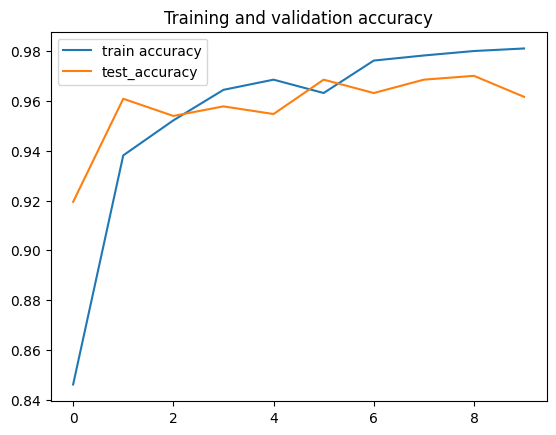

<Figure size 640x480 with 0 Axes>

In [22]:
plt.plot(model.history.history['accuracy'],label='train accuracy')
plt.plot(model.history.history['val_accuracy'],label='test_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

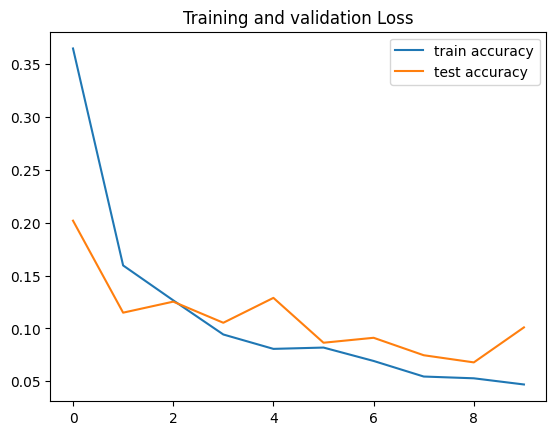

In [23]:
plt.plot(model.history.history['loss'],label='train accuracy')
plt.plot(model.history.history['val_loss'],label='test accuracy')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.show()

In [24]:
print("The Training Accuracy:" ,model.history.history['accuracy'])
print("The Highest Training Accuracy: 0.9640787839889526")
print("\n")
print("The Validation Accuracy" ,model.history.history['val_accuracy'])
print("The Highest Validation Accuracy: 0.967024564743042")


The Training Accuracy: [0.8461145162582397, 0.9381390810012817, 0.9521983861923218, 0.9644683003425598, 0.9685583114624023, 0.9631901979446411, 0.9762269854545593, 0.9782719612121582, 0.9800613522529602, 0.981083869934082]
The Highest Training Accuracy: 0.9640787839889526


The Validation Accuracy [0.9194785356521606, 0.9608895778656006, 0.953987717628479, 0.9578220844268799, 0.9547545909881592, 0.9685583114624023, 0.9631901979446411, 0.9685583114624023, 0.9700919985771179, 0.9616564512252808]
The Highest Validation Accuracy: 0.967024564743042
